In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p,x):
    f=np.poly1d(p)
    return f(x)

def residuals_func(p,x,y):
    ret=fit_func(p,x)-y
    return ret

In [3]:
x=np.linspace(0,1,10)
x_points=np.linspace(0,1,1000)
y_=real_func(x)
y=[np.random.normal(0,0.1)+y1 for y1 in y_]#加噪声

def fitting(M=0):
    p_init=np.random.rand(M+1)
    p_lsq=leastsq(residuals_func,p_init,args=(x,y))
    print('Fitting Parameters:',p_lsq[0])
    
    plt.plot(x_points,real_func(x_points),label='real')
    plt.plot(x_points,fit_func(p_lsq[0],x_points),label='fitted curve')
    plt.plot(x,y,'bo',label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.02441735]


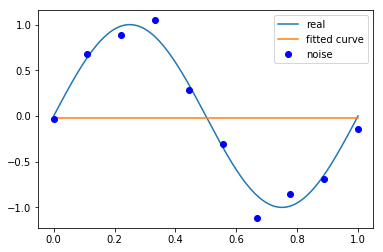

In [4]:
p_lsq_0=fitting(M=0)

Fitting Parameters: [-1.43699613  0.69408072]


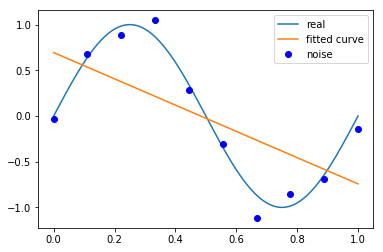

In [5]:
p_lsq_1=fitting(M=1)

Fitting Parameters: [ 21.21479834 -32.07711845  10.89202609  -0.0770364 ]


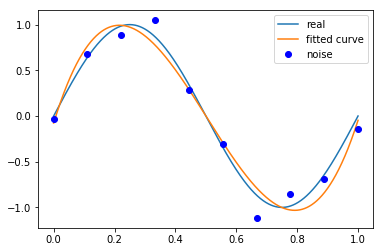

In [6]:
p_lsq_3=fitting(M=3)

Fitting Parameters: [ 6.07493299e+04 -2.72267206e+05  5.13296309e+05 -5.29063790e+05
  3.24003977e+05 -1.19650820e+05  2.56964616e+04 -2.89839184e+03
  1.34021821e+02 -3.53139402e-02]


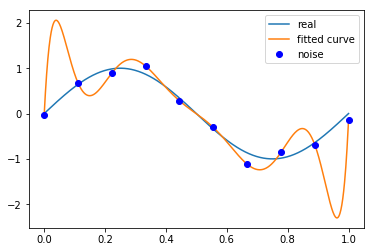

In [13]:
p_lsq_9=fitting(M=9)

In [ ]:
#正则化，降低过拟合

In [15]:
regularization=0.0001

def residuals_func_regularization(p,x,y):
    ret=fit_func(p,x)-y
    ret=np.append(ret,np.sqrt(0.5*regularization*np.square(p)))#L2范数作为正则化项
    return ret


In [16]:
#最小二乘法，加正则化项
p_init=np.random.rand(9+1)
p_lsq_regularization=leastsq(residuals_func_regularization,p_init,args=(x,y))

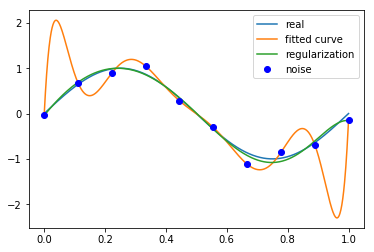

In [17]:
plt.plot(x_points,real_func(x_points),label='real')
plt.plot(x_points,fit_func(p_lsq_9[0],x_points),label='fitted curve')
plt.plot(x_points,fit_func(p_lsq_regularization[0],x_points),label='regularization')
plt.plot(x,y,'bo',label='noise')
plt.legend()